<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<h1 align="left"> Actividad 3 - Actividad grupal: Análisis libre de un catálogo de datos</h1>

* JUAN MANUEL BAUTISTA CORREA – Líder</br>
* WILLIAM RAMIRO RIOS HENAO – Analista de Datos</br>
* JUAN DAVID ESCOBAR ESCOBAR – Ingeniero de Datos</br>
* ANDRÉS FELIPE LEAL MORA – Manipulación de Datos</br></br>

* Marzo 2022.
* Grupo 14.

<h3>Catalogos de Datos</h3>

<ol type="1">
  <li>
      <span><b>Fuente de datos 1: </b></span><a href="https://github.com/juadaves91/unir-tecnicas-ia/blob/main/Actividad%203/COVID-19-geographic-disbtribution-worldwide.xlsx">COVID-19-geographic-disbtribution-worldwide.xlsx</a>, Tomados de <a href="https://data.europa.eu/euodp/es/data/dataset/covid-19-coronavirus-data/"> (Ver más)</a>
    </li>
      <li>
            <span><b>Fuente de datos 2: </b></span><a href="https://github.com/juadaves91/unir-tecnicas-ia/blob/main/Actividad%203/Muertes%20VIH.xlsx">Muertes VIH.xlsx</a>, Tomados de <a href="https://www.who.int/data/gho/data/indicators/indicator-details/GHO/number-of-deaths-due-to-hiv-aids"> (Ver más)</a>
    </li>   
      <li>
            <span><b>Fuente de datos 3: </b></span><a href="https://raw.githubusercontent.com/juadaves91/unir-tecnicas-ia/main/Actividad%203/CONSOLIDADO_COVID_VIH_2013_2020.csv">CONSOLIDADO_COVID_VIH_2013_2020.csv</a>,  conjunto de datos unificado y consolidado (Fuente de datos 1 + Fuente de datos 2), mediante la intersección del campo estandarizado PAIS. 
    </li>
</ol>  

## EDA - Exploración de datos

### Install libraries

In [1]:
!pip install requests

### importar librerias e inicializar variables 

In [1]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://github.com/juadaves91/unir-tecnicas-ia/blob/main/Actividad%203/CONSOLIDADO_COVID_VIH_2013_2020%20(1).csv"
download = requests.get(url).content

#df_covid_vih = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=";")

df_covid_vih = pd.read_csv('CONSOLIDADO_COVID_VIH_2013_2020.csv', sep=";", ) # Lectura del dataset, guardado de manera local

print(df_covid_vih.head())

df_covid_vih.shape

          PAIS CONTINENTE  PERIODO  CASOS_COVID  MUERTES_COVID  MUERTES_VIH  \
0  Afghanistan       Asia     2020      49273.0         1971.0        540.0   
1      Albania     Europe     2020      48530.0         1003.0         99.0   
2      Algeria     Africa     2020      92102.0         2596.0        350.0   
3      Andorra     Europe     2020       7338.0           79.0          NaN   
4       Angola     Africa     2020      16188.0          371.0      16000.0   

    POBLACION AREA_KM2  PROMEDIO_EDAD  COVERTURA_TERAPIA_VIH  
0  38928346.0   652,86           18.0                    9.0  
1   2877797.0     27,4           36.0                   47.0  
2  43851044.0  2381740           29.0                   85.0  
3     77265.0      470           46.0                    NaN  
4  32866272.0  1246700           17.0                   33.0  


(1704, 10)

In [3]:
df_covid_vih['AREA_KM2'] = df_covid_vih['AREA_KM2'].str.replace(",", ".").astype(float)

In [4]:
df_covid_vih.head()

,PAIS,CONTINENTE,PERIODO,CASOS_COVID,MUERTES_COVID,MUERTES_VIH,POBLACION,AREA_KM2,PROMEDIO_EDAD,COVERTURA_TERAPIA_VIH
0,Afghanistan,Asia,2020,49273.0,1971.0,540.0,38928346.0,652.86,18.0,9.0
1,Albania,Europe,2020,48530.0,1003.0,99.0,2877797.0,27.40,36.0,47.0
2,Algeria,Africa,2020,92102.0,2596.0,350.0,43851044.0,2381740.00,29.0,85.0
3,Andorra,Europe,2020,7338.0,79.0,NaN,77265.0,470.00,46.0,NaN
4,Angola,Africa,2020,16188.0,371.0,16000.0,32866272.0,1246700.00,17.0,33.0


In [5]:
df_covid_vih.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PAIS                   1704 non-null   object 
 1   CONTINENTE             1704 non-null   object 
 2   PERIODO                1704 non-null   int64  
 3   CASOS_COVID            213 non-null    float64
 4   MUERTES_COVID          279 non-null    float64
 5   MUERTES_VIH            1040 non-null   float64
 6   POBLACION              213 non-null    float64
 7   AREA_KM2               213 non-null    float64
 8   PROMEDIO_EDAD          213 non-null    float64
 9   COVERTURA_TERAPIA_VIH  131 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 133.2+ KB


### Validar valores de cada variable

In [6]:
#df_covid_vih['PAIS'].unique()

In [7]:
df_covid_vih['CONTINENTE'].unique()

array(['Asia', 'Europe', 'Africa', 'America', 'Oceania'], dtype=object)

In [8]:
df_covid_vih['PERIODO'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013], dtype=int64)

In [9]:
#df_covid_vih['CASOS_COVID'].unique()

In [10]:
#df_covid_vih['MUERTES_COVID'].unique()

In [11]:
#df_covid_vih['MUERTES_VIH'].unique()

### Remplazo de valores null para estandarizar tipos de datos correctos

In [12]:
'''
TIPOS DE DATOS INFERIDOS AUTOMATICAMENTE POR PANDAS:

Nro  Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PAIS           1704 non-null   object 
 1   CONTINENTE     1704 non-null   object 
 2   PERIODO        1704 non-null   int64  
 3   CASOS_COVID    1704 non-null   int64  
 4   MUERTES_COVID  279 non-null    float64
 5   MUERTES_VIH    1040 non-null   float64
 
 
TIPOS DE DATOS CORRECTOS:
 
 Nro  Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PAIS           1704 non-null   object or category
 1   CONTINENTE     1704 non-null   object or category 
 2   PERIODO        1704 non-null   int64  
 3   CASOS_COVID    1704 non-null   int64  
 4   MUERTES_COVID  279 non-null    int64
 5   MUERTES_VIH    1040 non-null   int64
 
 https://pbpython.com/pandas_dtypes.html
 '''

'\nTIPOS DE DATOS INFERIDOS AUTOMATICAMENTE POR PANDAS:\n\nNro  Column         Non-Null Count  Dtype  \n---  ------         --------------  -----  \n 0   PAIS           1704 non-null   object \n 1   CONTINENTE     1704 non-null   object \n 2   PERIODO        1704 non-null   int64  \n 3   CASOS_COVID    1704 non-null   int64  \n 4   MUERTES_COVID  279 non-null    float64\n 5   MUERTES_VIH    1040 non-null   float64\n \n \nTIPOS DE DATOS CORRECTOS:\n \n Nro  Column         Non-Null Count  Dtype  \n---  ------         --------------  -----  \n 0   PAIS           1704 non-null   object or category\n 1   CONTINENTE     1704 non-null   object or category \n 2   PERIODO        1704 non-null   int64  \n 3   CASOS_COVID    1704 non-null   int64  \n 4   MUERTES_COVID  279 non-null    int64\n 5   MUERTES_VIH    1040 non-null   int64\n \n https://pbpython.com/pandas_dtypes.html\n '

In [13]:
df_covid_vih['CASOS_COVID'] = df_covid_vih['CASOS_COVID'].fillna('0')
df_covid_vih['MUERTES_COVID'] = df_covid_vih['MUERTES_COVID'].fillna('0')
df_covid_vih['MUERTES_VIH'] = df_covid_vih['MUERTES_VIH'].fillna('0')
df_covid_vih['POBLACION'] = df_covid_vih['POBLACION'].fillna('0')
df_covid_vih['AREA_KM2'] = df_covid_vih['AREA_KM2'].fillna('0')
df_covid_vih['PROMEDIO_EDAD'] = df_covid_vih['PROMEDIO_EDAD'].fillna('0')
df_covid_vih['COVERTURA_TERAPIA_VIH'] = df_covid_vih['COVERTURA_TERAPIA_VIH'].fillna('0')

In [14]:
df_covid_vih['CASOS_COVID'] = df_covid_vih['CASOS_COVID'].astype('int')
df_covid_vih['MUERTES_COVID'] = df_covid_vih['MUERTES_COVID'].astype('int')
df_covid_vih['MUERTES_VIH'] = df_covid_vih['MUERTES_VIH'].astype('int')
df_covid_vih['POBLACION'] = df_covid_vih['POBLACION'].astype('int')
df_covid_vih['AREA_KM2'] = df_covid_vih['AREA_KM2'].astype('float')
df_covid_vih['PROMEDIO_EDAD'] = df_covid_vih['PROMEDIO_EDAD'].astype('int')
df_covid_vih['COVERTURA_TERAPIA_VIH'] = df_covid_vih['COVERTURA_TERAPIA_VIH'].astype('int')

In [15]:
df_covid_vih.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PAIS                   1704 non-null   object 
 1   CONTINENTE             1704 non-null   object 
 2   PERIODO                1704 non-null   int64  
 3   CASOS_COVID            1704 non-null   int32  
 4   MUERTES_COVID          1704 non-null   int32  
 5   MUERTES_VIH            1704 non-null   int32  
 6   POBLACION              1704 non-null   int32  
 7   AREA_KM2               1704 non-null   float64
 8   PROMEDIO_EDAD          1704 non-null   int32  
 9   COVERTURA_TERAPIA_VIH  1704 non-null   int32  
dtypes: float64(1), int32(6), int64(1), object(2)
memory usage: 93.3+ KB


In [16]:
list_cols_estandarizadas = ['CASOS_COVID', 'MUERTES_COVID', 'MUERTES_VIH']

# Para visualizar los datos en forma de listas.
#for col in list_cols_estandarizadas:
#    print(col, '\n', '-'*20)
#    print(df_covid_vih[col].unique())

### Descripción de los datos

In [136]:
df_covid_vih_stats = df_covid_vih.describe()
df_covid_vih_stats = df_covid_vih_stats.transpose()
df_covid_vih_stats

,count,mean,std,min,25%,50%,75%,max
PERIODO,1704.0,2.016500e+03,2.291960e+00,2013.0,2014.75,2016.5,2018.25,2.020000e+03
CASOS_COVID,1704.0,4.196179e+04,5.129320e+05,0.0,0.00,0.0,0.00,1.625675e+07
MUERTES_COVID,1704.0,9.464941e+02,1.035305e+04,0.0,0.00,0.0,0.00,2.991770e+05
MUERTES_VIH,1704.0,3.183318e+03,9.452751e+03,0.0,0.00,99.0,1300.00,9.900000e+04
POBLACION,1704.0,4.549485e+06,5.138057e+07,0.0,0.00,0.0,0.00,1.439324e+09
AREA_KM2,1704.0,5.930409e+04,6.496052e+05,0.0,0.00,0.0,0.00,1.637687e+07
PROMEDIO_EDAD,1704.0,3.948357e+00,1.097409e+01,0.0,0.00,0.0,0.00,7.000000e+01
COVERTURA_TERAPIA_VIH,1704.0,4.778756e+00,1.746399e+01,0.0,0.00,0.0,0.00,9.300000e+01


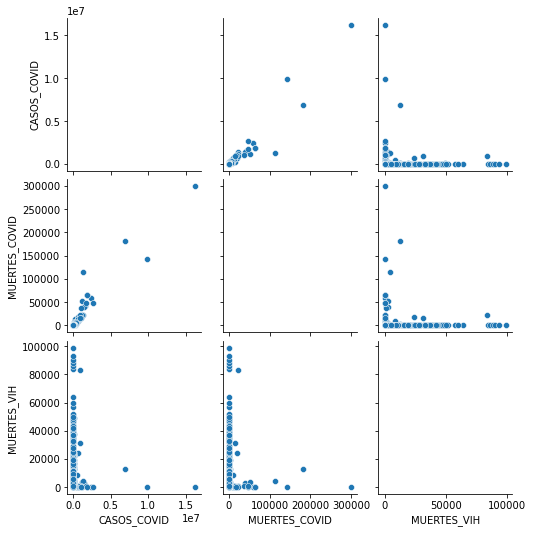

In [18]:
sns.pairplot(df_covid_vih[["CASOS_COVID", "MUERTES_COVID", "MUERTES_VIH"]], diag_kind="PAIS")

# CLUSTERING

In [19]:
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np

In [142]:
df_covid_vih_2020 = df_covid_vih[df_covid_vih['PERIODO']==2020]
df_covid_vih_2020

,PAIS,CONTINENTE,PERIODO,CASOS_COVID,MUERTES_COVID,MUERTES_VIH,POBLACION,AREA_KM2,PROMEDIO_EDAD,COVERTURA_TERAPIA_VIH
0,Afghanistan,Asia,2020,49273,1971,540,38928346,652.86,18,9
1,Albania,Europe,2020,48530,1003,99,2877797,27.40,36,47
2,Algeria,Africa,2020,92102,2596,350,43851044,2381740.00,29,85
3,Andorra,Europe,2020,7338,79,0,77265,470.00,46,0
4,Angola,Africa,2020,16188,371,16000,32866272,1246700.00,17,33
...,...,...,...,...,...,...,...,...,...,...
208,Wallis_and_Futuna,Oceania,2020,3,0,0,11239,140.00,34,0
209,Western_Sahara,Africa,2020,766,1,0,597339,266.00,28,0
210,Yemen,Asia,2020,2083,606,499,29825964,527.97,20,28
211,Zambia,Africa,2020,18274,367,24000,18383955,743.39,18,81


In [143]:
df_covid_vih_2020 = df_covid_vih_2020.describe()
df_covid_vih_2020 = df_covid_vih_2020.transpose()
df_covid_vih_2020

,count,mean,std,min,25%,50%,75%,max
PERIODO,213.0,2.020000e+03,0.000000e+00,2020.00,2020.0,2020.00,2020.00,2.020000e+03
CASOS_COVID,213.0,3.356943e+05,1.419300e+06,1.00,1947.0,17638.00,147150.00,1.625675e+07
MUERTES_COVID,213.0,7.571953e+03,2.847139e+04,0.00,35.0,273.00,2552.00,2.991770e+05
MUERTES_VIH,213.0,2.816479e+03,8.580443e+03,0.00,0.0,99.00,1100.00,8.300000e+04
POBLACION,213.0,3.639588e+07,1.415709e+08,348.00,786552.0,6825445.00,25499884.00,1.439324e+09
AREA_KM2,213.0,4.744327e+05,1.786603e+06,0.44,62.2,257.67,769.63,1.637687e+07
PROMEDIO_EDAD,213.0,3.158685e+01,9.502146e+00,15.00,24.0,32.00,40.00,7.000000e+01
COVERTURA_TERAPIA_VIH,213.0,3.823005e+01,3.413387e+01,0.00,0.0,44.00,69.00,9.300000e+01


Cálculo de la tasa de mortalidad y de la tasa de letalidad.

$$ Tasa\space de\space Mortalidad = \frac{Número \space de\space fallecidos\space por\space Covid}{Población\space total}*100.000$$

$$ Tasa\space de\space Letalidad = \frac{Número \space de\space fallecidos\space por\space Covid}{Cantidad\space de\space contagios\space de \space Covid}*100 $$

In [21]:
df_covid_vih_2020 = df_covid_vih_2020.assign(TASA_LETALIDAD = 100*(df_covid_vih_2020['MUERTES_COVID']/df_covid_vih_2020['CASOS_COVID']),
                                             TASA_MORTALIDAD = 100000*(df_covid_vih_2020['MUERTES_COVID']/df_covid_vih_2020['POBLACION']))
df_covid_vih_2020

,PAIS,CONTINENTE,PERIODO,CASOS_COVID,MUERTES_COVID,MUERTES_VIH,POBLACION,AREA_KM2,PROMEDIO_EDAD,COVERTURA_TERAPIA_VIH,TASA_LETALIDAD,TASA_MORTALIDAD
0,Afghanistan,Asia,2020,49273,1971,540,38928346,652.86,18,9,4.000162,5.063149
1,Albania,Europe,2020,48530,1003,99,2877797,27.40,36,47,2.066763,34.853049
2,Algeria,Africa,2020,92102,2596,350,43851044,2381740.00,29,85,2.818614,5.920041
3,Andorra,Europe,2020,7338,79,0,77265,470.00,46,0,1.076588,102.245519
4,Angola,Africa,2020,16188,371,16000,32866272,1246700.00,17,33,2.291821,1.128817
...,...,...,...,...,...,...,...,...,...,...,...,...
208,Wallis_and_Futuna,Oceania,2020,3,0,0,11239,140.00,34,0,0.000000,0.000000
209,Western_Sahara,Africa,2020,766,1,0,597339,266.00,28,0,0.130548,0.167409
210,Yemen,Asia,2020,2083,606,499,29825964,527.97,20,28,29.092655,2.031787
211,Zambia,Africa,2020,18274,367,24000,18383955,743.39,18,81,2.008318,1.996306


### Normalización

In [22]:
from sklearn import preprocessing

data_2020 = pd.DataFrame(df_covid_vih_2020, columns = ['TASA_LETALIDAD', 'TASA_MORTALIDAD','AREA_KM2', 'PROMEDIO_EDAD'])
data_sd = preprocessing.scale(data_2020)
data_sd = pd.DataFrame(data_sd, columns = ['TASA_LETALIDAD', 'TASA_MORTALIDAD', 'AREA_KM2', 'PROMEDIO_EDAD'])

#data_sd['PAIS'] = df_covid_vih_2020['PAIS'] # Se adiciona la columna PAIS en el dataframe normalizado, para conservar la relacion entre el indice y el nombre del pais
data_sd.tail()

,TASA_LETALIDAD,TASA_MORTALIDAD,AREA_KM2,PROMEDIO_EDAD
208,-0.818729,-0.124727,-0.266097,0.254556
209,-0.764071,-0.124330,-0.266027,-0.378368
210,11.361975,-0.119908,-0.265880,-1.222266
211,0.022126,-0.119992,-0.265759,-1.433241
212,0.324226,-0.119828,-0.265959,-1.327753


### Eliminacion de outliers

Se muestran varias graficas de dispersion, con el fin de detectar outliers en los datos.

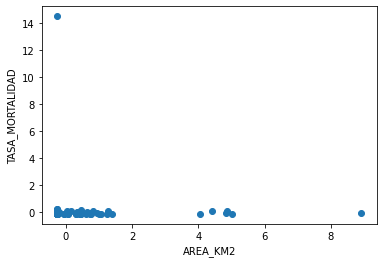

In [23]:
plt.scatter(data_sd['AREA_KM2'], data_sd['TASA_MORTALIDAD'])
plt.xlabel('AREA_KM2')
plt.ylabel('TASA_MORTALIDAD')
plt.show()

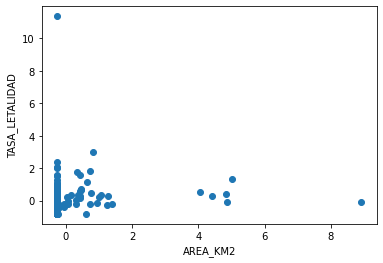

In [24]:
plt.scatter(data_sd['AREA_KM2'], data_sd['TASA_LETALIDAD'])
plt.xlabel('AREA_KM2')
plt.ylabel('TASA_LETALIDAD')
plt.show()

Se define una funcion para la eliminacion de outlier con base en los parametros de la media y desviacion tipica muestral.

In [25]:
def drop_outliers_of_col(serie):
    mean = np.mean(serie)
    std = np.std(serie)
    
    max_val = mean + 3*std
    min_val = mean - 3*std
    
    max_cond = serie <= max_val
    min_cond = serie >= min_val
    
    return max_cond & min_cond

In [26]:
data_sd_no_out = data_sd

cond = drop_outliers_of_col(data_sd_no_out['TASA_MORTALIDAD'])
data_sd_no_out = data_sd_no_out.loc[cond]

cond = drop_outliers_of_col(data_sd_no_out['TASA_LETALIDAD'])
data_sd_no_out = data_sd_no_out.loc[cond]

data_sd_no_out.shape

(211, 4)

Se observa que el nuevo dataframe "data_sd_no_out", sobre el cual se aplico la eliminacion de outliers, presenta 211 observaciones, dos menos que el dataframe original.

Se muestran nuevamente las graficas de dispersion con los outliers eliminados.

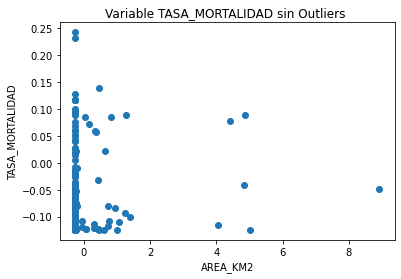

In [27]:
plt.scatter(data_sd_no_out['AREA_KM2'], data_sd_no_out['TASA_MORTALIDAD'])
plt.title('Variable TASA_MORTALIDAD sin Outliers ')
plt.xlabel('AREA_KM2')
plt.ylabel('TASA_MORTALIDAD')
plt.show()

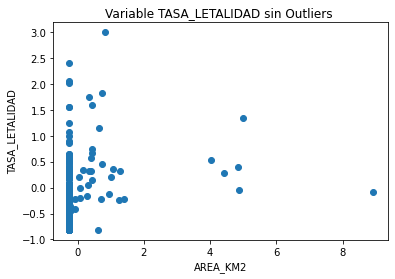

In [28]:
plt.scatter(data_sd_no_out['AREA_KM2'], data_sd_no_out['TASA_LETALIDAD'])
plt.title('Variable TASA_LETALIDAD sin Outliers ')
plt.xlabel('AREA_KM2')
plt.ylabel('TASA_LETALIDAD')
plt.show()

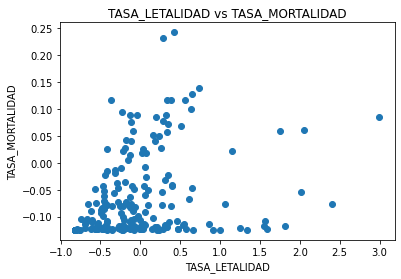

In [29]:
plt.scatter(data_sd_no_out['TASA_LETALIDAD'], data_sd_no_out['TASA_MORTALIDAD'])
plt.title('TASA_LETALIDAD vs TASA_MORTALIDAD')
plt.xlabel('TASA_LETALIDAD')
plt.ylabel('TASA_MORTALIDAD')
plt.show()

A continuacion, se calcula el coeficiente de correlacion cofenetico, el cual resulta de la comparacion entre la distancia cofenetica y la distancia real (matriz de salida de linkage y matriz de salida de pdist). Cuanto mas cercano a la unidad sea el coeficiente, mas preciso sera el clustering.

In [30]:
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet, fcluster
from scipy.spatial.distance import pdist

#df_paises = data_sd_no_out.pop("PAIS") # Se elimina la variable categorica PAIS, antes de aplicar el proceso de clustering

Z = linkage(data_sd_no_out, "ward") # Agrupa las observaciones con base en su similitud. Se seleccionó el método WARD para agrupar los cluster

c, coph_dist = cophenet(Z, pdist(data_sd_no_out))
c

0.6038003651906382

In [31]:
#Z[:20]

In [32]:
#Z[-10:,]

### Graficando el Dendrograma

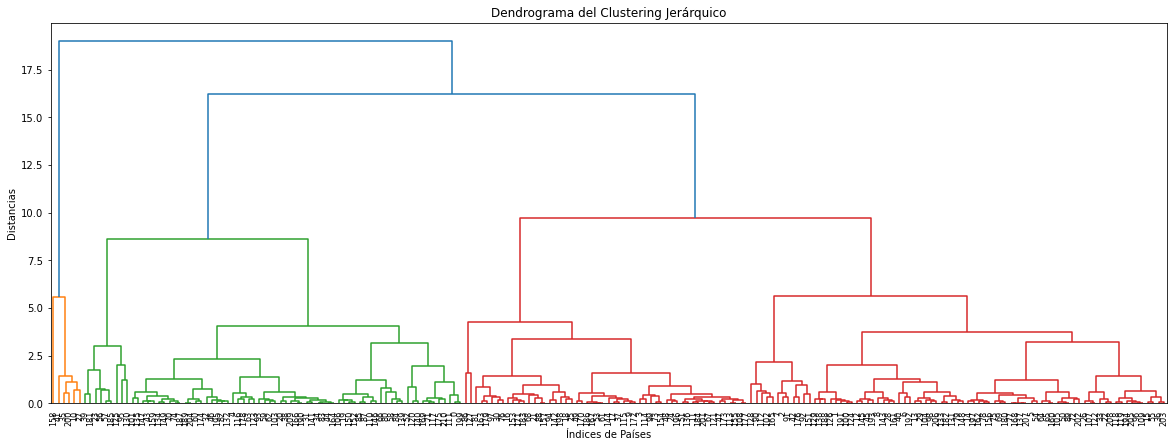

In [33]:
plt.figure(figsize=(20,7))
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Índices de Países')
plt.ylabel('Distancias')
dendrogram = sch.dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0,)
plt.show()

In [34]:
clusters = fcluster(Z, t=10, criterion="distance") # donde t es la altura a la cual se realiza el corte al dendograma para que se definan los tres clusters
set(clusters)
#print(assignments)

{1, 2, 3}

Se adiciona la etiqueta de pertenencia del cluster al dataframe sin outliers

In [35]:
data_sd_no_out['NUMERO_CLUSTER'] = clusters
data_sd_no_out.head()
#data_sd_no_out.tail()

,TASA_LETALIDAD,TASA_MORTALIDAD,AREA_KM2,PROMEDIO_EDAD,NUMERO_CLUSTER
0,0.856085,-0.112718,-0.265809,-1.433241,2
1,0.046596,-0.042064,-0.266160,0.465531,3
2,0.361386,-0.110686,1.070076,-0.272880,3
3,-0.367977,0.117775,-0.265912,1.520404,3
4,0.140825,-0.122049,0.433273,-1.538728,2


In [36]:
data_sd_no_out.shape

(211, 5)

Se realizan los calculos de metricas descriptivas de los datos, discriminando el cluster al cual pertenecen, con el fin de identificar el grupo que presento la situacion mas critica respecto de la situacion generada por el COVID.  

### Datos para el cluster 1

In [37]:
cluster_1 = data_sd_no_out.loc[data_sd_no_out.loc[:, 'NUMERO_CLUSTER'] == 1]
cluster_1

,TASA_LETALIDAD,TASA_MORTALIDAD,AREA_KM2,PROMEDIO_EDAD,NUMERO_CLUSTER
10,0.537510,-0.116281,4.043902,0.676505,1
27,0.281692,0.077683,4.423076,0.149069,1
35,0.401773,-0.040325,4.835648,0.992967,1
41,1.338102,-0.123946,5.000987,0.676505,1
159,-0.078183,-0.048437,8.921905,0.887480,1
201,-0.048210,0.089644,4.865894,0.676505,1


En este punto se recuperan los datos del dataframe original para poder interpretar las metricas calculadas.

In [38]:
cluster_1_df_covid_vih = df_covid_vih_2020.loc[cluster_1.index]
cluster_1_df_covid_vih

,PAIS,CONTINENTE,PERIODO,CASOS_COVID,MUERTES_COVID,MUERTES_VIH,POBLACION,AREA_KM2,PROMEDIO_EDAD,COVERTURA_TERAPIA_VIH,TASA_LETALIDAD,TASA_MORTALIDAD
10,Australia,Oceania,2020,28031,908,99,25499884,7682300.0,38,85,3.239271,3.560801
27,Brazil,America,2020,6901952,181402,13000,212559417,8358140.0,33,70,2.628271,85.341785
35,Canada,America,2020,460743,13431,0,37742154,9093510.0,41,73,2.915074,35.586204
41,China,Asia,2020,91994,4739,0,1439323776,9388211.0,38,0,5.151423,0.329252
159,Russia,Europe,2020,2653928,46941,0,145934462,16376870.0,40,0,1.768737,32.165809
201,United_States_of_America,America,2020,16256754,299177,0,331002651,9147420.0,38,0,1.840324,90.385077


In [145]:
cluster_1_stats = cluster_1_df_covid_vih[['AREA_KM2', 'PROMEDIO_EDAD', 'TASA_LETALIDAD','TASA_MORTALIDAD']].describe().round(3)
cluster_1_stats = cluster_1_stats.transpose()
cluster_1_stats

,count,mean,std,min,25%,50%,75%,max
AREA_KM2,6.0,1.000774e+07,3182905.952,7682300.000,8541982.500,9120465.000,9328013.250,1.637687e+07
PROMEDIO_EDAD,6.0,3.800000e+01,2.757,33.000,38.000,38.000,39.500,4.100000e+01
TASA_LETALIDAD,6.0,2.924000e+00,1.238,1.769,2.037,2.772,3.158,5.151000e+00
TASA_MORTALIDAD,6.0,4.122800e+01,38.905,0.329,10.712,33.876,72.903,9.038500e+01


In [40]:
cluster_1_df_covid_vih['PAIS'].unique()

array(['Australia', 'Brazil', 'Canada', 'China', 'Russia',
       'United_States_of_America'], dtype=object)

### Datos para el cluster 2

In [41]:
cluster_2 = data_sd_no_out.loc[data_sd_no_out.loc[:, 'NUMERO_CLUSTER'] == 2]
#cluster_2.head()

In [42]:
cluster_2_df_covid_vih = df_covid_vih_2020.loc[cluster_2.index]
#cluster_2_df_covid_vih

In [144]:
cluster_2_stats = cluster_2_df_covid_vih[['AREA_KM2', 'PROMEDIO_EDAD','TASA_LETALIDAD','TASA_MORTALIDAD']].describe().round(3)
cluster_2_stats = cluster_2_stats.transpose()
cluster_2_stats

,count,mean,std,min,25%,50%,75%,max
AREA_KM2,72.0,212504.952,516807.192,10.12,95.810,265.635,838.918,2267050.000
PROMEDIO_EDAD,72.0,21.514,4.648,15.00,18.750,20.000,24.000,45.000
TASA_LETALIDAD,72.0,2.467,1.943,0.00,1.236,1.980,3.076,9.116
TASA_MORTALIDAD,72.0,9.591,18.217,0.00,0.596,2.024,7.011,88.382


In [44]:
cluster_2_df_covid_vih['PAIS'].unique()

array(['Afghanistan', 'Angola', 'Belize', 'Benin', 'Bolivia',
       'Burkina_Faso', 'Burundi', 'Cameroon', 'Central_African_Republic',
       'Chad', 'Comoros', 'Congo', 'Cote_dIvoire',
       'Democratic_Republic_of_the_Congo', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Eswatini',
       'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Ghana', 'Guatemala',
       'Guinea', 'Guinea_Bissau', 'Guyana', 'Haiti', 'Honduras', 'Iraq',
       'Isle_of_Man', 'Jordan', 'Kenya', 'Kyrgyzstan', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mexico',
       'Montserrat', 'Mozambique', 'Namibia', 'Nepal', 'Nicaragua',
       'Niger', 'Nigeria', 'Pakistan', 'Palestine', 'Papua_New_Guinea',
       'Paraguay', 'Philippines', 'Rwanda', 'Sao_Tome_and_Principe',
       'Senegal', 'Sierra_Leone', 'Solomon_Islands', 'Somalia',
       'South_Sudan', 'Sudan', 'Syria', 'Tajikistan', 'Timor_Leste',
       'Togo', 'Uganda', 'United_Republic_of_Tanzania', 'Vanu

### Datos para el cluster 3

In [45]:
cluster_3 = data_sd_no_out.loc[data_sd_no_out.loc[:, 'NUMERO_CLUSTER'] == 3]
#cluster_3.head()

In [46]:
cluster_3_df_covid_vih = df_covid_vih_2020.loc[cluster_3.index]
#cluster_3_df_covid_vih

In [146]:
cluster_3_stats = cluster_3_df_covid_vih[['AREA_KM2', 'PROMEDIO_EDAD', 'TASA_LETALIDAD','TASA_MORTALIDAD']].describe().round(3)
cluster_3_stats = cluster_3_stats.transpose()
cluster_3_stats

,count,mean,std,min,25%,50%,75%,max
AREA_KM2,133.0,193284.235,589486.814,0.44,51.000,230.170,566.730,2973190.000
PROMEDIO_EDAD,133.0,36.872,6.824,24.00,32.000,37.000,42.000,70.000
TASA_LETALIDAD,133.0,1.438,1.038,0.00,0.671,1.431,2.088,4.710
TASA_MORTALIDAD,133.0,30.732,34.961,0.00,2.436,17.946,48.854,154.889


In [48]:
cluster_3_df_covid_vih['PAIS'].unique()

array(['Albania', 'Algeria', 'Andorra', 'Anguilla', 'Antigua_and_Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Bermuda', 'Bhutan',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'British_Virgin_Islands', 'Brunei_Darussalam',
       'Bulgaria', 'Cambodia', 'Cape_Verde', 'Cayman_Islands', 'Chile',
       'Colombia', 'Costa_Rica', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus',
       'Czech_Republic', 'Denmark', 'Dominica', 'Dominican_Republic',
       'Estonia', 'Falkland_Islands_(Malvinas)', 'Faroe_Islands',
       'Finland', 'France', 'French_Polynesia', 'Georgia', 'Germany',
       'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guam', 'Guernsey',
       'Holy_See', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey',
       'Kazakhstan', 'Kosovo', 'Kuwait', 'Laos', 'Latvia

### Resultados del clustering

Claramente se observa que los paises pertenecientes al **cluster 1**, son los que presentan una mayor media en la tasa de letalidad, es decir, la relación entre la cantidad de personas fallecidas a causa del virus SARS-Cov-2 y la cantidad de contagiados por el virus. Sin embargo, el resultado es lógico, pues son los paises que tienen una mayor extensión geográfica, en los que fue dispendiosa la labor del proceso de vacunación para evitar muertes. Coincidencialmente, estos paises, en su mayoría, no presentan datos sobre las muertes a causa de VIH, que es el tema de interés del presente estudio.

Por consiguiente, el análisis se centrará en los paises que hacen parte del **cluster 2**, los cuales presentan una media de la tasa de letalidad mayor que los del tercer cluster.

In [49]:
cluster_2_df_covid_vih.head(10)

,PAIS,CONTINENTE,PERIODO,CASOS_COVID,MUERTES_COVID,MUERTES_VIH,POBLACION,AREA_KM2,PROMEDIO_EDAD,COVERTURA_TERAPIA_VIH,TASA_LETALIDAD,TASA_MORTALIDAD
0,Afghanistan,Asia,2020,49273,1971,540,38928346,652.86,18,9,4.000162,5.063149
4,Angola,Africa,2020,16188,371,16000,32866272,1246700.00,17,33,2.291821,1.128817
19,Belize,America,2020,9295,195,300,397628,22.81,25,39,2.097902,49.040812
20,Benin,Africa,2020,3090,44,2000,12123200,112.76,19,70,1.423948,0.362940
23,Bolivia,America,2020,147150,9018,350,11673021,1083300.00,26,68,6.128440,77.255065
31,Burkina_Faso,Africa,2020,4030,71,3300,20903273,273.60,18,72,1.761787,0.339660
32,Burundi,Africa,2020,729,1,1700,11890784,25.68,17,88,0.137174,0.008410
34,Cameroon,Africa,2020,25143,443,14000,26545863,472.71,19,74,1.761922,1.668810
38,Central_African_Republic,Africa,2020,4936,63,3200,4829767,622.98,18,58,1.276337,1.304411
39,Chad,Africa,2020,1770,102,3000,16425864,1259200.00,17,69,5.762712,0.620972


# MODELO DE REGRESIÓN LINEAL

In [50]:
import tensorflow as tf
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from tensorflow import keras
from tensorflow.keras import layers
from ann_visualizer.visualize import ann_viz

## Correlación

Se calcula la correlacion de cada uno de los parametros con la variable objeto de prediccion 'MUERTES_VIH'

In [51]:
df_covid_vih_C2 = cluster_2_df_covid_vih[['MUERTES_VIH', 'POBLACION', 'AREA_KM2', 'PROMEDIO_EDAD','COVERTURA_TERAPIA_VIH', 'TASA_LETALIDAD', 'TASA_MORTALIDAD']]

crr = df_covid_vih_C2.corr()['MUERTES_VIH'].drop('MUERTES_VIH')
print(crr)

POBLACION                0.487482
AREA_KM2                 0.052066
PROMEDIO_EDAD           -0.332945
COVERTURA_TERAPIA_VIH    0.394585
TASA_LETALIDAD          -0.120605
TASA_MORTALIDAD         -0.220224
Name: MUERTES_VIH, dtype: float64


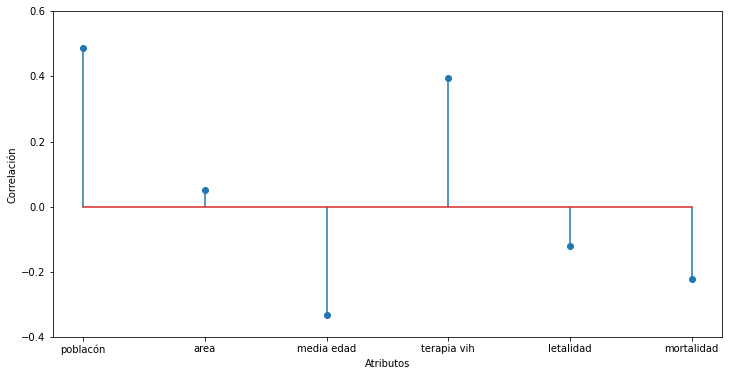

In [52]:
x1 = (0.487482,0.052066,-0.332945,0.394585,-0.120605,-0.220224)
y1 = ("poblacón","area","media edad","terapia vih","letalidad","mortalidad")

fig = plt.figure(figsize = (12,6))
plt.stem(y1, x1)
plt.ylim(-0.4, 0.6)
plt.ylabel('Correlación')
plt.xlabel('Atributos')
plt.title('')
plt.show()

Se observa que los parámetros área y letalidad, son los que presentan menor nivel de correlación con la cantidad de muertes por VIH. En tanto que los parámetros población y media edad, presentan un nivel medianamente alto de correlación. Luego se seleccionan los atributos con mayor nivel de correlación, conforme con un umbral establecido.

In [53]:
    crr_abs = crr.abs()
    crr_select = crr_abs[crr_abs > 0.20].index.values.tolist()
    crr_select

['POBLACION', 'PROMEDIO_EDAD', 'COVERTURA_TERAPIA_VIH', 'TASA_MORTALIDAD']

In [54]:
X = df_covid_vih_C2[crr_select] 
Y = df_covid_vih_C2['MUERTES_VIH']

### Normalización

In [55]:
X_norm = preprocessing.StandardScaler().fit(X).transform(X)

## Regresión Lineal

In [60]:
import statsmodels.formula.api as smf

In [61]:
#cluster_2_df_covid_vih # Dataframe correspondiente al cluster número 2

### Predicción de Muertes VIH en Función de la Población

Se construye un modelo de regresion lineal, con el fin de predecir el atributo "MUERTES_VIH" en funcion de la variable "POBLACION".

In [62]:
lm = smf.ols(formula = "MUERTES_VIH~POBLACION", data = cluster_2_df_covid_vih).fit()

In [63]:
lm.params

Intercept    2667.214781
POBLACION       0.000108
dtype: float64

El modelo lineal predictivo es de la forma: $y = ax + b$, y para el caso particular es $MUERTES \space VIH = 0.000108*POBLACION + 2667.214781$
El modelo lineal indica que un aumento en 100.000 unidades de la población, representaría un aumento de 10 unidades en muertes por VIH.

In [64]:
lm.pvalues

Intercept    0.023186
POBLACION    0.000014
dtype: float64

Como los p-valores son pequeños, cercanos al cero, entonces significa que los parámetros son significativos y se puede garantizar que no son cero.

In [65]:
lm.rsquared

0.23763841034850575

El $R^2$

In [66]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MUERTES_VIH   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     21.82
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           1.41e-05
Time:                        08:12:17   Log-Likelihood:                -750.60
No. Observations:                  72   AIC:                             1505.
Df Residuals:                      70   BIC:                             1510.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2667.2148   1149.004      2.321      0.023     375.599    4958.831
POBLACION      0.0001   2.32e-05      4.671      0.000     6.2e-05       0.000
==============================================================================
Omnibus:                       34.159   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.721
Skew:                           1.619   Prob(JB):                     3.61e-17
Kurtosis:                       6.842   Cond. No.                     5.85e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.85e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El la tabla resumen de los parámetros, los indicadores de criterio AIC y BIC, son de valor alto lo cual nuevamente da indicios de un buen modelo lineal. También se observa que el intervalo de confianza al 95%, no contiene el cero.

A continuación, un resultado de la predicción del modelo que contiene la POBLACION como parámetro único del modelo.

In [67]:
MUERTES_VIH_pred = lm.predict(pd.DataFrame(cluster_2_df_covid_vih["POBLACION"]))
MUERTES_VIH_pred

0      6878.236705
4      6222.479933
19     2710.227660
20     3978.625777
23     3929.928264
          ...     
196    7615.187225
200    9128.884168
205    2700.439782
211    4655.874601
212    4274.991768
Length: 72, dtype: float64

En la gráfica se muestran los datos originales del dataset, de muertes por VIH en función de la población, contrastado con la línea correspondiente al modelo lineal que mejor se ajusta.

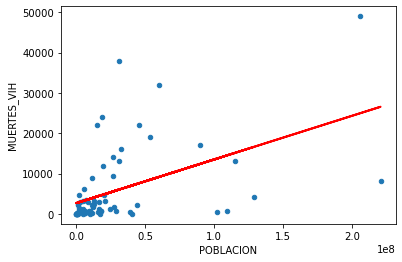

In [68]:
%matplotlib inline

cluster_2_df_covid_vih.plot(kind = "scatter", x = "POBLACION", y = "MUERTES_VIH")
plt.plot(pd.DataFrame(cluster_2_df_covid_vih["POBLACION"]), MUERTES_VIH_pred, c = "red", linewidth = 2)

In [69]:
cluster_2_df_covid_vih["MUERTES_VIH_pred"] = 2667.214781 + 0.000108*cluster_2_df_covid_vih["POBLACION"] # Se adiciona una columna de predicciones al dataset

cluster_2_df_covid_vih["RSE"] = (cluster_2_df_covid_vih["MUERTES_VIH"]-cluster_2_df_covid_vih["MUERTES_VIH_pred"])**2 # Se adiciona una columna del error al dataset

In [70]:
SSD = sum(cluster_2_df_covid_vih["RSE"]) # Suma de los cuadrados de la diferencia
SSD

4784977477.678088

In [71]:
RSE = np.sqrt(SSD/(len(cluster_2_df_covid_vih)-2)) # Desviacion tipida de los residuos
RSE

8267.818400865308

In [72]:
MUERTES_VIH_mean = np.mean(cluster_2_df_covid_vih["MUERTES_VIH"])
MUERTES_VIH_mean

5511.694444444444

In [73]:
error_promedio = RSE/MUERTES_VIH_mean
error_promedio

1.5000502085522758

El error indica que hay un 150% de la desviación tipica del modelo, que no queda explicado. Es decir, la relación entre las variables POBLACION Y MUERTES_VIH, no puede ser ajustado como un modelo lineal, a pesar que los p-valores hayan resultado con valores bajos.

(array([ 2.,  2., 13., 39.,  5.,  5.,  1.,  2.,  2.,  1.]),
 array([-18323.587501, -13295.508927,  -8267.430353,  -3239.351779,
          1788.726795,   6816.805369,  11844.883943,  16872.962517,
         21901.041091,  26929.119665,  31957.198239]),
 <BarContainer object of 10 artists>)

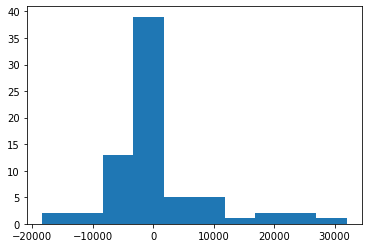

In [74]:
plt.hist((cluster_2_df_covid_vih["MUERTES_VIH"]-cluster_2_df_covid_vih["MUERTES_VIH_pred"]))

Los errores, por consiguiente, siguen una distribución normal de media cero.

### Predicción de Muertes VIH en Función del Promedio de Edad

In [75]:
lm2 = smf.ols(formula = "MUERTES_VIH~PROMEDIO_EDAD", data = cluster_2_df_covid_vih).fit()

In [76]:
lm2.params

Intercept        20000.738300
PROMEDIO_EDAD     -673.473956
dtype: float64

In [77]:
lm2.pvalues

Intercept        0.000162
PROMEDIO_EDAD    0.004267
dtype: float64

In [78]:
lm2.rsquared

0.1108522807296286

In [79]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MUERTES_VIH   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     8.727
Date:                Fri, 04 Mar 2022   Prob (F-statistic):            0.00427
Time:                        08:12:32   Log-Likelihood:                -756.14
No. Observations:                  72   AIC:                             1516.
Df Residuals:                      70   BIC:                             1521.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept          2e+04   5016.232      3.987      0.000    9996.178       3e+04
PROMEDIO_EDAD  -673.4740    227.975     -2.954      0.004   -1128.155    -218.793
==============================================================================
Omnibus:                       54.977   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.735
Skew:                           2.428   Prob(JB):                     1.05e-46
Kurtosis:                       9.855   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
MUERTES_VIH_pred_2 = lm2.predict(pd.DataFrame(cluster_2_df_covid_vih["PROMEDIO_EDAD"]))

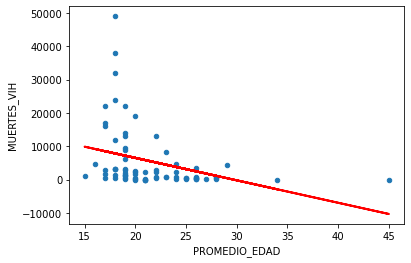

In [81]:
%matplotlib inline

cluster_2_df_covid_vih.plot(kind = "scatter", x = "PROMEDIO_EDAD", y = "MUERTES_VIH")
plt.plot(pd.DataFrame(cluster_2_df_covid_vih["PROMEDIO_EDAD"]), MUERTES_VIH_pred_2, c = "red", linewidth = 2)

In [82]:
cluster_2_df_covid_vih["MUERTES_VIH_pred_2"] = 20000.738300 - 673.473956*cluster_2_df_covid_vih["PROMEDIO_EDAD"] # Se adiciona una columna de predicciones al dataset

cluster_2_df_covid_vih["RSE2"] = (cluster_2_df_covid_vih["MUERTES_VIH"]-cluster_2_df_covid_vih["MUERTES_VIH_pred_2"])**2 # Se adiciona una columna del error al dataset

In [83]:
SSD2 = sum(cluster_2_df_covid_vih["RSE2"]) # Suma de los cuadrados de la diferencia
SSD2

5580746873.289362

In [84]:
RSE2 = np.sqrt(SSD2/(len(cluster_2_df_covid_vih)-2)) # Desviacion tipida de los residuos
RSE2

8928.883207473664

In [85]:
MUERTES_VIH_mean_2 = np.mean(cluster_2_df_covid_vih["MUERTES_VIH"])
MUERTES_VIH_mean_2

5511.694444444444

In [86]:
error_promedio_2 = RSE2/MUERTES_VIH_mean_2
error_promedio_2

1.6199887888330968

(array([30., 23.,  7.,  5.,  4.,  0.,  1.,  1.,  0.,  1.]),
 array([-8798.62896  , -3806.5867732,  1185.4554136,  6177.4976004,
        11169.5397872, 16161.581974 , 21153.6241608, 26145.6663476,
        31137.7085344, 36129.7507212, 41121.792908 ]),
 <BarContainer object of 10 artists>)

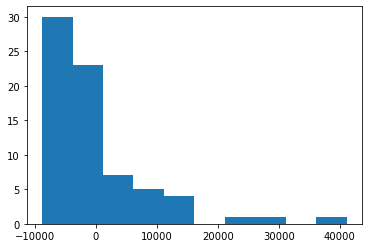

In [87]:
plt.hist((cluster_2_df_covid_vih["MUERTES_VIH"]-cluster_2_df_covid_vih["MUERTES_VIH_pred_2"]))

### Predicción de Muertes VIH en Función de la Cobertura de Terapia Para el VIH

In [88]:
lm3 = smf.ols(formula = "MUERTES_VIH~COVERTURA_TERAPIA_VIH", data = cluster_2_df_covid_vih).fit()

In [89]:
lm3.params

Intercept               -1374.516395
COVERTURA_TERAPIA_VIH     131.793509
dtype: float64

In [90]:
lm3.pvalues

Intercept                0.529224
COVERTURA_TERAPIA_VIH    0.000604
dtype: float64

In [91]:
lm3.rsquared

0.15569725027790715

In [92]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MUERTES_VIH   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.91
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           0.000604
Time:                        08:12:43   Log-Likelihood:                -754.27
No. Observations:                  72   AIC:                             1513.
Df Residuals:                      70   BIC:                             1517.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1374.5164   2173.693     -0.632      0.529   -5709.811    2960.778
COVERTURA_TERAPIA_VIH   131.7935     36.682      3.593      0.001      58.633     204.954
==============================================================================
Omnibus:                       50.883   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.425
Skew:                           2.248   Prob(JB):                     1.09e-39
Kurtosis:                       9.293   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
MUERTES_VIH_pred_3 = lm3.predict(pd.DataFrame(cluster_2_df_covid_vih["COVERTURA_TERAPIA_VIH"]))

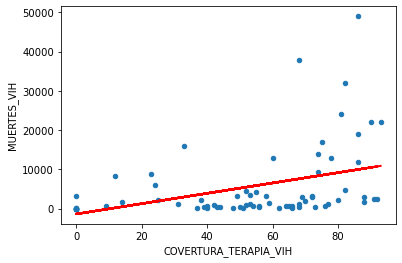

In [94]:
%matplotlib inline

cluster_2_df_covid_vih.plot(kind = "scatter", x = "COVERTURA_TERAPIA_VIH", y = "MUERTES_VIH")
plt.plot(pd.DataFrame(cluster_2_df_covid_vih["COVERTURA_TERAPIA_VIH"]), MUERTES_VIH_pred_3, c = "red", linewidth = 2)

In [95]:
cluster_2_df_covid_vih["MUERTES_VIH_pred_3"] = - 1374.516395 + 131.793509*cluster_2_df_covid_vih["COVERTURA_TERAPIA_VIH"] # Se adiciona una columna de predicciones al dataset

cluster_2_df_covid_vih["RSE3"] = (cluster_2_df_covid_vih["MUERTES_VIH"]-cluster_2_df_covid_vih["MUERTES_VIH_pred_3"])**2 # Se adiciona una columna del error al dataset

In [96]:
SSD3 = sum(cluster_2_df_covid_vih["RSE3"]) # Suma de los cuadrados de la diferencia
SSD3

5299276856.367222

In [97]:
RSE3 = np.sqrt(SSD3/(len(cluster_2_df_covid_vih)-2)) # Desviacion tipida de los residuos
RSE3


8700.801979757976

In [98]:
MUERTES_VIH_mean_3 = np.mean(cluster_2_df_covid_vih["MUERTES_VIH"])
MUERTES_VIH_mean_3

5511.694444444444

In [99]:
error_promedio_3 = RSE3/MUERTES_VIH_mean_3
error_promedio_3

1.5786074622710657

(array([31., 14., 15.,  5.,  4.,  0.,  1.,  0.,  1.,  1.]),
 array([-8523.312397 , -3766.9536952,   989.4050066,  5745.7637084,
        10502.1224102, 15258.481112 , 20014.8398138, 24771.1985156,
        29527.5572174, 34283.9159192, 39040.274621 ]),
 <BarContainer object of 10 artists>)

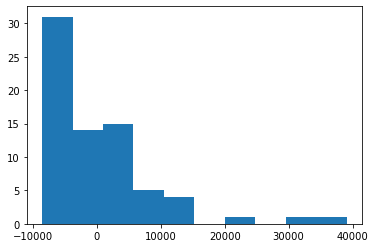

In [100]:
plt.hist((cluster_2_df_covid_vih["MUERTES_VIH"]-cluster_2_df_covid_vih["MUERTES_VIH_pred_3"]))

### Predicción de Muertes VIH en Función de la Tasa de Mortalidad

In [101]:
lm4 = smf.ols(formula = "MUERTES_VIH~TASA_MORTALIDAD", data = cluster_2_df_covid_vih).fit()

In [102]:
lm4.params

Intercept          6601.773423
TASA_MORTALIDAD    -113.659410
dtype: float64

In [103]:
lm4.pvalues

Intercept          0.000001
TASA_MORTALIDAD    0.063049
dtype: float64

In [104]:
lm4.rsquared

0.04849847731310075

In [105]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MUERTES_VIH   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     3.568
Date:                Fri, 04 Mar 2022   Prob (F-statistic):             0.0630
Time:                        08:12:56   Log-Likelihood:                -758.58
No. Observations:                  72   AIC:                             1521.
Df Residuals:                      70   BIC:                             1526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6601.7734   1232.065      5.358      0.000    4144.497    9059.050
TASA_MORTALIDAD  -113.6594     60.172     -1.889      0.063    -233.669       6.351
==============================================================================
Omnibus:                       56.715   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.820
Skew:                           2.520   Prob(JB):                     4.12e-49
Kurtosis:                       9.991   Cond. No.                         23.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
MUERTES_VIH_pred_4 = lm4.predict(pd.DataFrame(cluster_2_df_covid_vih["TASA_MORTALIDAD"]))

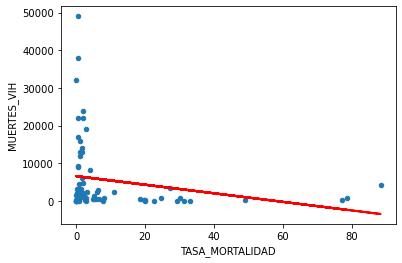

In [107]:
%matplotlib inline

cluster_2_df_covid_vih.plot(kind = "scatter", x = "TASA_MORTALIDAD", y = "MUERTES_VIH")
plt.plot(pd.DataFrame(cluster_2_df_covid_vih["TASA_MORTALIDAD"]), MUERTES_VIH_pred_4, c = "red", linewidth = 2)

In [108]:
cluster_2_df_covid_vih["MUERTES_VIH_pred_4"] = 6601.773423 - 113.659410*cluster_2_df_covid_vih["TASA_MORTALIDAD"] # Se adiciona una columna de predicciones al dataset

cluster_2_df_covid_vih["RSE4"] = (cluster_2_df_covid_vih["MUERTES_VIH"]-cluster_2_df_covid_vih["MUERTES_VIH_pred_4"])**2 # Se adiciona una columna del error al dataset


In [109]:
SSD4 = sum(cluster_2_df_covid_vih["RSE4"]) # Suma de los cuadrados de la diferencia
SSD4

5972111306.794331

In [110]:
RSE4 = np.sqrt(SSD4/(len(cluster_2_df_covid_vih)-2)) # Desviacion tipida de los residuos
RSE4

9236.65934260583

In [111]:
MUERTES_VIH_mean_4 = np.mean(cluster_2_df_covid_vih["MUERTES_VIH"])
MUERTES_VIH_mean_4

5511.694444444444

In [112]:
error_promedio_4 = RSE4/MUERTES_VIH_mean_4
error_promedio_4

1.6758293544222127

(array([49.,  9.,  5.,  3.,  3.,  0.,  1.,  1.,  0.,  1.]),
 array([-6601.773423  , -1695.17351105,  3211.42640091,  8118.02631286,
        13024.62622482, 17931.22613677, 22837.82604873, 27744.42596068,
        32651.02587263, 37557.62578459, 42464.22569654]),
 <BarContainer object of 10 artists>)

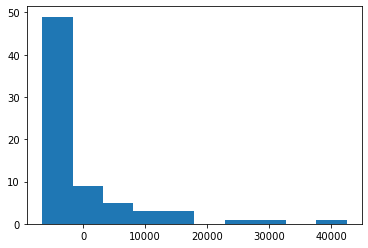

In [113]:
plt.hist((cluster_2_df_covid_vih["MUERTES_VIH"]-cluster_2_df_covid_vih["MUERTES_VIH_pred_4"]))

## Regresión Lineal Múltiple

En razón a que el modelo lineal creado, no presentó los resultados esperados con el uso del atributo "POBLACION" que tiene el mayor valor para el coeficiente de correlación, se construirá un modelo de regresión lineal múltiple, usando las variables en conjunto, que obtuvieron un mayor nivel de coeficiente de correlación.

Se procederá entonces a utilizar el modelo anterior y añadir una variable, para calcular nuevamente el modelo y verificar si el error residual de suma de los cuadrados residuales disminuye. La combinación de las variables que genere el menor error, será el modelo de regresión lineal múltiple escogido.

In [114]:
crr_select # Atributos con mayor valor para el coeficiente de correlación

['POBLACION', 'PROMEDIO_EDAD', 'COVERTURA_TERAPIA_VIH', 'TASA_MORTALIDAD']

### Predicción de Muertes VIH en Función de la Población + Cobertura Terapia de VIH

Se adiciona una segunda variable, al modelo construido con el atributo de POBLACIÓN, con el fin de mejorar el modelo. El segundo atributo con mejores resultados es COVERTURA_TERAPIA_VIH.

In [115]:
lm5 = smf.ols(formula = "MUERTES_VIH~POBLACION+COVERTURA_TERAPIA_VIH", data = cluster_2_df_covid_vih).fit()

In [116]:
lm5.params

Intercept               -3503.386686
POBLACION                   0.000103
COVERTURA_TERAPIA_VIH     120.941337
dtype: float64

In [117]:
lm5.pvalues

Intercept                0.076033
POBLACION                0.000008
COVERTURA_TERAPIA_VIH    0.000336
dtype: float64

In [118]:
lm5.rsquared

0.368101993714151

In [119]:
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MUERTES_VIH   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     20.10
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           1.33e-07
Time:                        08:13:09   Log-Likelihood:                -743.84
No. Observations:                  72   AIC:                             1494.
Df Residuals:                      69   BIC:                             1501.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -3503.3867   1944.974     -1.801      0.076   -7383.503     376.730
POBLACION                 0.0001   2.13e-05      4.816      0.000    6.01e-05       0.000
COVERTURA_TERAPIA_VIH   120.9413     32.043      3.774      0.000      57.018     184.865
==============================================================================
Omnibus:                       30.748   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.208
Skew:                           1.503   Prob(JB):                     5.12e-14
Kurtosis:                       6.372   Cond. No.                     1.08e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
MUERTES_VIH_pred_5 = lm5.predict(pd.DataFrame(cluster_2_df_covid_vih[["POBLACION", "COVERTURA_TERAPIA_VIH"]]))

In [121]:
SSD5 = sum((cluster_2_df_covid_vih["MUERTES_VIH"]-MUERTES_VIH_pred_5)**2) # Suma de los cuadrados de la diferencia
SSD5

3966115805.4944167

In [122]:
RSE5 = np.sqrt(SSD5/(len(cluster_2_df_covid_vih)-2-1))
RSE5

7581.55255934192

In [123]:
error_promedio_5 = RSE5/MUERTES_VIH_mean
error_promedio_5

1.3755393438008534

Con base en los parámetros calculados, se evidencia que el modelo mejora.

### Predicción de Muertes VIH en Función de la Población + Covertura Terapia de VIH + Promedio Edad

Se adiciona una tercera variable, al anterior modelo construido con los atributo de POBLACIÓN y COVERTURA TERAPIA VIH, con el fin de establecer si el modelo mejora nuevamente. El tercer atributo con mejores resultados es PROMEDIO EDAD.

In [124]:
lm6 = smf.ols(formula = "MUERTES_VIH~POBLACION+COVERTURA_TERAPIA_VIH+PROMEDIO_EDAD", data = cluster_2_df_covid_vih).fit()

In [125]:
lm6.params

Intercept                7280.862285
POBLACION                   0.000101
COVERTURA_TERAPIA_VIH      99.983788
PROMEDIO_EDAD            -448.146168
dtype: float64

In [126]:
lm6.pvalues

Intercept                0.156850
POBLACION                0.000007
COVERTURA_TERAPIA_VIH    0.002961
PROMEDIO_EDAD            0.025525
dtype: float64

In [127]:
lm6.rsquared

0.41310957570316165

In [128]:
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MUERTES_VIH   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     15.95
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           5.89e-08
Time:                        08:13:14   Log-Likelihood:                -741.18
No. Observations:                  72   AIC:                             1490.
Df Residuals:                      68   BIC:                             1499.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              7280.8623   5085.968      1.432      0.157   -2868.028    1.74e+04
POBLACION                 0.0001   2.07e-05      4.869      0.000    5.94e-05       0.000
COVERTURA_TERAPIA_VIH    99.9838     32.432      3.083      0.003      35.266     164.701
PROMEDIO_EDAD          -448.1462    196.246     -2.284      0.026    -839.749     -56.543
==============================================================================
Omnibus:                       31.617   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.657
Skew:                           1.570   Prob(JB):                     4.09e-14
Kurtosis:                       6.271   Cond. No.                     2.91e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
MUERTES_VIH_pred_6 = lm6.predict(pd.DataFrame(cluster_2_df_covid_vih[["POBLACION", "COVERTURA_TERAPIA_VIH", "PROMEDIO_EDAD"]]))

In [130]:
SSD6 = sum((cluster_2_df_covid_vih["MUERTES_VIH"]-MUERTES_VIH_pred_6)**2) # Suma de los cuadrados de la diferencia
SSD6

3683625149.5372725

In [131]:
RSE6 = np.sqrt(SSD6/(len(cluster_2_df_covid_vih)-3-1))
RSE6

7360.092260388485

In [132]:
error_promedio_6 = RSE6/MUERTES_VIH_mean
error_promedio_6

1.3353592682931013

Al agregar la tercera variable, aunque se incrementa el valor del parámetro R2, el error calculado disminuye muy poco.